# Lab 03: PyTorch를 이용한 선형회귀 (Linear Regression)

이 노트북에서는 다음을 수행합니다:
1. 공부한 시간(x)과 성적(y) 데이터를 임의로 생성
2. PyTorch `nn.Linear`를 사용해 선형회귀 층 생성
3. Adam Optimizer를 사용한 모델 학습
4. 1000 epoch 동안 loss가 줄어드는 과정 시각화

### Prompt

다음 요구사항에 맞춰 PyTorch 코드를 작성해줘:

 1. 데이터 생성 : 공부한 시간(x)과 성적(y) 데이터를 임의로 생성

 2. 모델 정의 : nn.Linear를 사용해 선형회귀 층 구현

 3. 설정 : Adam Optimizer 사용

 4. 학습 및 시각화 : 1000 epoch 학습 및 Loss 감소 그래프 출력

 저장 : 전체 코드를 Lab03.ipynb로 저장


In [ ]:
# 필요한 라이브러리 임포트
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 재현성을 위한 시드 설정
torch.manual_seed(42)
np.random.seed(42)

## 1. 데이터 생성

공부한 시간(x)과 성적(y) 데이터를 생성합니다.
- 실제 관계: y = 10 * x + noise
- 공부 시간: 0~10시간
- 성적 범위: 0~100점

In [ ]:
# 데이터 생성: 공부한 시간(x)과 성적(y)
num_samples = 100

# x: 공부한 시간 (0~10시간)
x = np.random.rand(num_samples, 1) * 10

# y: 성적 = 10 * 공부시간 + 노이즈
# 실제 관계식에 약간의 노이즈를 추가하여 현실적인 데이터 생성
# 성적 범위를 0~100으로 제한
y = 10 * x + np.random.randn(num_samples, 1) * 5
y = np.clip(y, 0, 100)  # 0~100 범위로 클리핑

# NumPy 배열을 PyTorch 텐서로 변환
x_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y)

print(f"Data shape: x={x_tensor.shape}, y={y_tensor.shape}")
print(f"Study hours range: {x_tensor.min():.2f} ~ {x_tensor.max():.2f} hours")
print(f"Score range: {y_tensor.min():.2f} ~ {y_tensor.max():.2f} points")

In [ ]:
# 생성된 데이터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Relationship between Study Hours and Scores', fontsize=14, fontweight='bold')
plt.ylim(-5, 105)  # y축 범위를 0~100으로 설정
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2. 모델 정의

`nn.Linear`를 사용하여 선형회귀 모델을 정의합니다.
- 입력: 1개 (공부 시간)
- 출력: 1개 (성적)
- 모델: y = wx + b

In [ ]:
# 선형회귀 모델 정의
# nn.Linear(in_features, out_features)
# in_features=1: 입력 특성 개수 (공부 시간)
# out_features=1: 출력 특성 개수 (성적)
model = nn.Linear(in_features=1, out_features=1)

print("Model structure:")
print(model)
print("\nInitial parameters:")
print(f"Weight: {model.weight.item():.4f}")
print(f"Bias: {model.bias.item():.4f}")

## 3. 손실 함수와 옵티마이저 설정

- **손실 함수**: MSE (Mean Squared Error) - 회귀 문제에 적합
- **옵티마이저**: Adam - 학습률을 자동으로 조정하는 효율적인 옵티마이저

In [ ]:
# 손실 함수: MSE (Mean Squared Error)
criterion = nn.MSELoss()

# 옵티마이저: Adam
# lr=0.01: 학습률 (learning rate)
optimizer = optim.Adam(model.parameters(), lr=0.01)

print("Loss function:", criterion)
print("Optimizer:", optimizer)

## 4. 모델 학습

1000 epoch 동안 모델을 학습하고 loss를 기록합니다.

In [ ]:
# 학습 설정
num_epochs = 1000
loss_history = []  # loss 기록을 위한 리스트

# 학습 루프
for epoch in range(num_epochs):
    # 1. Forward pass: 예측값 계산
    predictions = model(x_tensor)
    
    # 2. 손실 계산
    loss = criterion(predictions, y_tensor)
    
    # 3. Backward pass: 그래디언트 계산
    optimizer.zero_grad()  # 이전 그래디언트 초기화
    loss.backward()  # 역전파로 그래디언트 계산
    
    # 4. 파라미터 업데이트
    optimizer.step()
    
    # 5. Loss 기록
    loss_history.append(loss.item())
    
    # 100 epoch마다 진행 상황 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("\nTraining completed!")
print(f"\nFinal parameters:")
print(f"Weight: {model.weight.item():.4f}")
print(f"Bias: {model.bias.item():.4f}")
print(f"\nActual relationship: y = 10 * x")
print(f"Learned relationship: y = {model.weight.item():.4f} * x + {model.bias.item():.4f}")

## 5. Loss 감소 과정 시각화

1000 epoch 동안 loss가 어떻게 감소하는지 시각화합니다.

In [ ]:
# Loss 감소 과정 시각화
plt.figure(figsize=(12, 5))

# 전체 loss 그래프
plt.subplot(1, 2, 1)
plt.plot(loss_history, linewidth=2, color='#2E86AB')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Loss Change During Entire Training Process', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 처음 100 epoch의 loss (초기 학습 과정 확대)
plt.subplot(1, 2, 2)
plt.plot(loss_history[:100], linewidth=2, color='#A23B72')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Loss Change in First 100 Epochs', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Initial Loss: {loss_history[0]:.4f}")
print(f"Final Loss: {loss_history[-1]:.4f}")
print(f"Loss Reduction Rate: {(1 - loss_history[-1]/loss_history[0]) * 100:.2f}%")

## 6. 학습 결과 시각화

원본 데이터와 학습된 선형회귀 선을 함께 시각화합니다.

In [ ]:
# 학습된 모델로 예측
model.eval()  # 평가 모드로 전환
with torch.no_grad():  # 그래디언트 계산 비활성화
    predicted = model(x_tensor).numpy()

# 결과 시각화
plt.figure(figsize=(10, 6))

# 원본 데이터
plt.scatter(x, y, alpha=0.6, s=50, label='Actual Data', 
            edgecolors='black', linewidth=0.5, color='#06A77D')

# 학습된 회귀선
plt.plot(x, predicted, color='#D62828', linewidth=3, 
         label=f'Learned Model: y = {model.weight.item():.2f}x + {model.bias.item():.2f}')

plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Linear Regression Training Results', fontsize=14, fontweight='bold')
plt.ylim(-5, 105)  # y축 범위를 0~100으로 설정
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. 새로운 데이터로 예측

학습된 모델을 사용하여 새로운 공부 시간에 대한 성적을 예측합니다.

In [ ]:
# 새로운 공부 시간에 대한 예측
test_hours = torch.FloatTensor([[3.0], [5.0], [7.0], [9.0]])

model.eval()
with torch.no_grad():
    predicted_scores = model(test_hours)

print("Prediction Results:")
print("-" * 40)
for hours, score in zip(test_hours, predicted_scores):
    print(f"Study Hours: {hours.item():.1f}h → Predicted Score: {score.item():.2f} points")

## 8. 새로운 데이터 예측 결과 시각화

학습 데이터와 새로운 테스트 데이터의 예측 결과를 함께 시각화합니다.

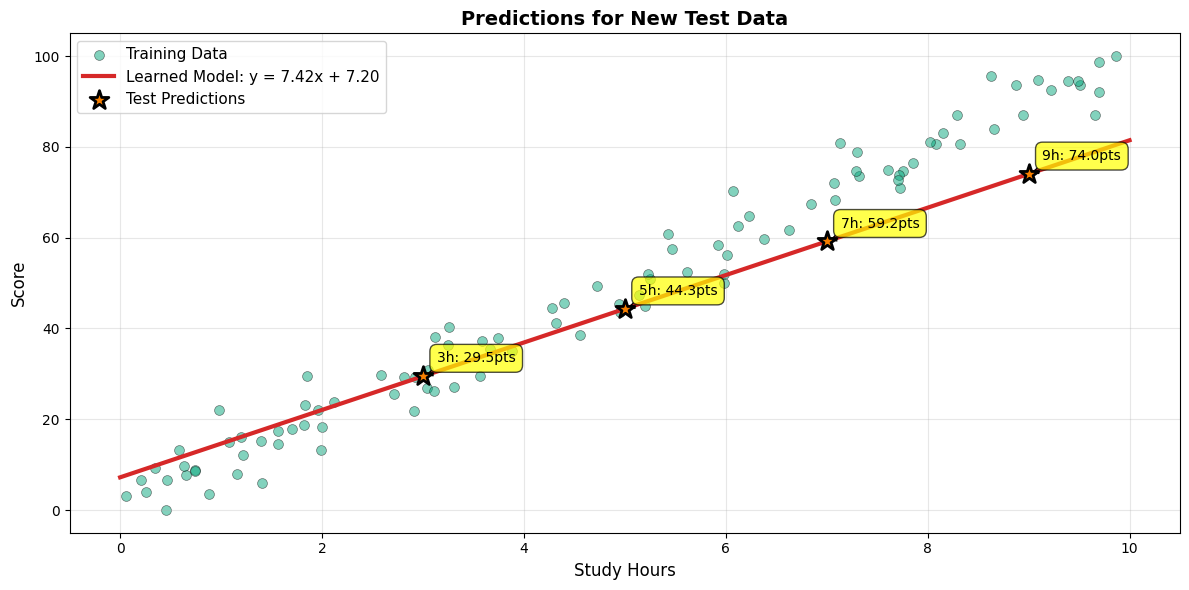

In [13]:
# 새로운 데이터 예측 결과 시각화
plt.figure(figsize=(12, 6))

# 원본 학습 데이터
plt.scatter(x, y, alpha=0.5, s=50, label='Training Data', 
            edgecolors='black', linewidth=0.5, color='#06A77D')

# 학습된 회귀선
x_line = np.linspace(0, 10, 100).reshape(-1, 1)
with torch.no_grad():
    y_line = model(torch.FloatTensor(x_line)).numpy()
plt.plot(x_line, y_line, color='#D62828', linewidth=3, 
         label=f'Learned Model: y = {model.weight.item():.2f}x + {model.bias.item():.2f}')

# 새로운 테스트 데이터 예측 결과
test_hours_np = test_hours.numpy()
predicted_scores_np = predicted_scores.numpy()
plt.scatter(test_hours_np, predicted_scores_np, s=200, marker='*', 
            color='#F77F00', edgecolors='black', linewidth=2, 
            label='Test Predictions', zorder=5)

# 테스트 데이터 포인트에 레이블 추가
for i, (hour, score) in enumerate(zip(test_hours_np, predicted_scores_np)):
    plt.annotate(f'{hour[0]:.0f}h: {score[0]:.1f}pts', 
                 xy=(hour[0], score[0]), 
                 xytext=(10, 10), 
                 textcoords='offset points',
                 fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='black'))

plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Predictions for New Test Data', fontsize=14, fontweight='bold')
plt.ylim(-5, 105)
plt.xlim(-0.5, 10.5)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

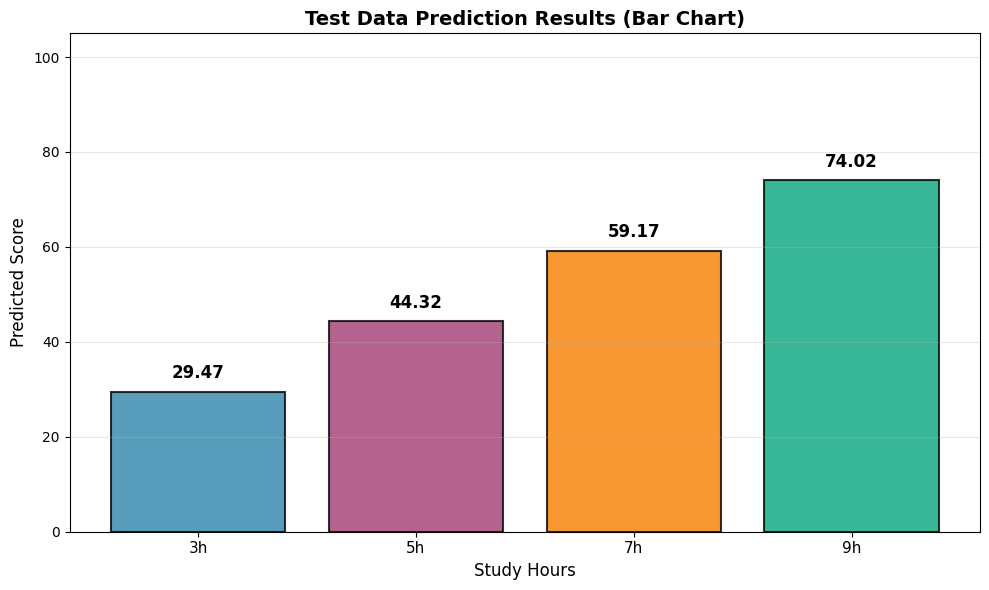

In [14]:
# 테스트 데이터 예측 결과를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))

test_hours_list = [h.item() for h in test_hours]
predicted_scores_list = [s.item() for s in predicted_scores]

bars = plt.bar(range(len(test_hours_list)), predicted_scores_list, 
               color=['#2E86AB', '#A23B72', '#F77F00', '#06A77D'],
               edgecolor='black', linewidth=1.5, alpha=0.8)

# 막대 위에 값 표시
for i, (bar, hours, score) in enumerate(zip(bars, test_hours_list, predicted_scores_list)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             f'{score:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(range(len(test_hours_list)), 
           [f'{h:.0f}h' for h in test_hours_list], fontsize=11)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Predicted Score', fontsize=12)
plt.title('Test Data Prediction Results (Bar Chart)', fontsize=14, fontweight='bold')
plt.ylim(0, 105)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()